# Sales Prediction with Python 

Auther@upenc

Intern at OASIS INFOBYTE

In [26]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pickle


%matplotlib inline

In [27]:
#Loading the dataset
df = pd.read_csv("Advertising.csv",index_col=0)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


## Data Overview

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [29]:
df.duplicated().sum()

0

In [30]:
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

we have our dataset ready with three types of advertising expenditures (TV, radio, and newspaper) and the corresponding sales figures.
* No mssing values.
* No duplicate value

## Descriptive Statistics Analysis

In [31]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## EDA


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

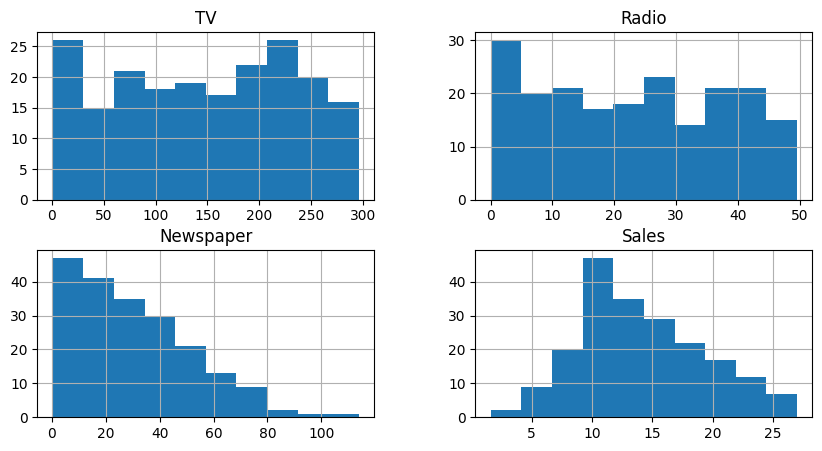

In [32]:
df.hist(figsize=(10,5))

<Axes: >

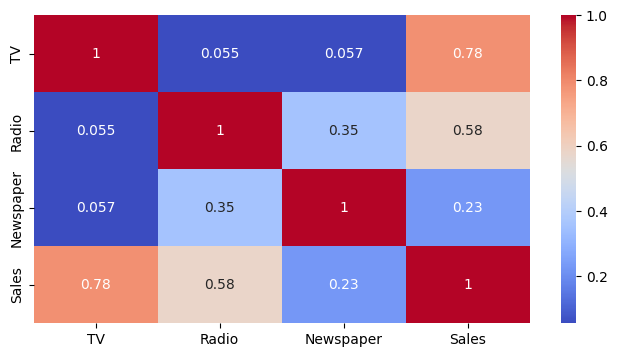

In [33]:
plt.figure(figsize=(8,4))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')

* TV advertising expenditures have a moderately strong positive linear relationship with sales.


<Figure size 1000x600 with 0 Axes>

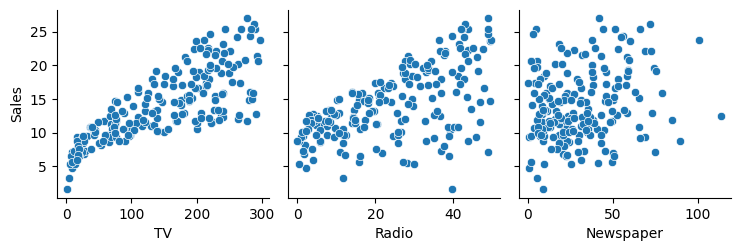

In [34]:
plt.figure(figsize=(10,6))
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'],y_vars='Sales')
plt.show()

Sales exhibits a stronger correlation with TV advertising compared to Radio and Newspaper, implying a more pronounced influence of TV advertising on Sales.

In [35]:
X= np.array(df.drop('Sales', axis=1))
y= np.array(df['Sales']).reshape(-1, 1)
print(X.shape)
print(y.shape)

(200, 3)
(200, 1)


In [36]:
from sklearn.model_selection import train_test_split

## Train Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Normalization

In [38]:
scaler = StandardScaler()

X_train_s= scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Sales Prediction

I will be using the following models:

* Linear Regression
* Random Forest Regressor

## Linear Regression

In [39]:
model=LinearRegression()
model.fit(X_train_s,y_train)

LinearRegression()

In [40]:
#Fitting the model
y_pred = model.predict(X_test_s)
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)

In [41]:
print("Mean Squared Error:", mse)
print("R2 Score:",r2)

Mean Squared Error: 3.174097353976106
R2 Score: 0.8994380241009119


## Evaluating the Linear Regression Model

In [42]:
linr = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_pred.flatten()})
linr.head()

,actual,predicted
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373


Text(0.5, 1.0, 'Model Performance')

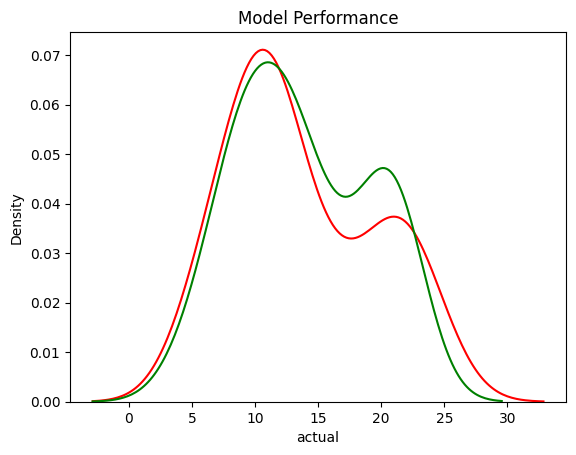

In [43]:
ax = sns.kdeplot(linr['actual'], color='r', label='Actual Price')
sns.kdeplot(linr['predicted'], color='g', label='Predicted Price', ax=ax)
plt.title("Model Performance")

The Red shows the distribution count for actual values and the Green line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

## Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [46]:
forest_pred = random_forest.predict(X_test_s)
mse_rf = mean_squared_error(y_test, forest_pred)
r2_rf=r2_score(y_test,forest_pred)


In [47]:
print("Mean Squared Error:", mse_rf)
print("R2 Score:",r2_rf)

Mean Squared Error: 0.570443600000002
R2 Score: 0.9819271656922779


## Evaluating Random Forest Regressor Model

In [48]:
data_frame = pd.DataFrame({'actual': y_test.flatten(), 'predicted': forest_pred.flatten()})
data_frame.head()

,actual,predicted
0,16.9,17.726
1,22.4,21.586
2,21.4,20.931
3,7.3,6.702
4,24.7,23.231


Text(0.5, 1.0, 'Model Performance')

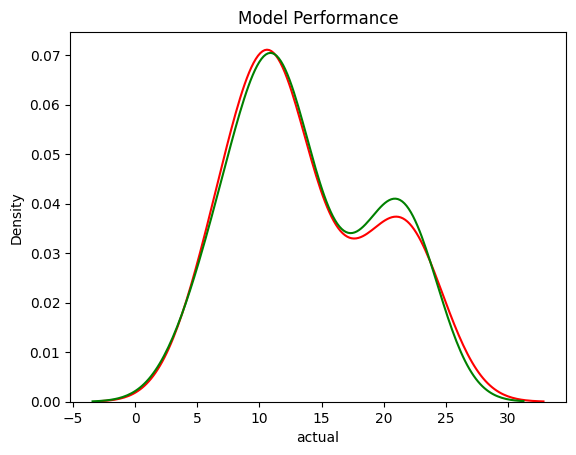

In [49]:
ax = sns.kdeplot(data_frame['actual'], color='r', label='Actual Price')
sns.kdeplot(data_frame['predicted'], color='g', label='Predicted Price', ax=ax)
plt.title("Model Performance")

The Red shows the distribution count for actual values and the Green line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

# Conclusion


* I have used regressor models - Linear Regression model and Random Forest Regressor for predicting the sales. 
* The Random Forest Regressor has performed well with the accuracy of **98%**

In [50]:
with open("model.pkl","wb") as f:
    pickle.dump(random_forest,f)
